# Kobe Bryant Shot Selection

**NBA** Which shots did Kobe sink?

Source: [Kaggle](https://www.kaggle.com/c/kobe-bryant-shot-selection)

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(666) # \m/

%matplotlib inline

## Getting and cleaning data

In [69]:
dataset = pd.read_csv('data.csv')

In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [71]:
print(dataset['shot_made_flag'].unique())

train = dataset[~np.isnan(dataset['shot_made_flag'])]
holdout = dataset[np.isnan(dataset['shot_made_flag'])]
holdout_ids = holdout['shot_id']

print(train.shape)
print(holdout.shape)

[ nan   0.   1.]
(25697, 25)
(5000, 25)


## Exploratory data analysis

In [72]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
game_event_id,25697.0,2.493487e+02,1.497785e+02,2.000000e+00,1.110000e+02,2.530000e+02,3.670000e+02,6.530000e+02
game_id,25697.0,2.474109e+07,7.738108e+06,2.000001e+07,2.050006e+07,2.090034e+07,2.960027e+07,4.990009e+07
lat,25697.0,3.395304e+01,8.815211e-02,3.325330e+01,3.388430e+01,3.397030e+01,3.404030e+01,3.408830e+01
loc_x,25697.0,7.148422e+00,1.100731e+02,-2.500000e+02,-6.700000e+01,0.000000e+00,9.400000e+01,2.480000e+02
loc_y,25697.0,9.125735e+01,8.815211e+01,-4.400000e+01,4.000000e+00,7.400000e+01,1.600000e+02,7.910000e+02
lon,25697.0,-1.182627e+02,1.100731e-01,-1.185198e+02,-1.183368e+02,-1.182698e+02,-1.181758e+02,-1.180218e+02
minutes_remaining,25697.0,4.886796e+00,3.452475e+00,0.000000e+00,2.000000e+00,5.000000e+00,8.000000e+00,1.100000e+01
period,25697.0,2.520800e+00,1.151626e+00,1.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00,7.000000e+00
playoffs,25697.0,1.462428e-01,3.533563e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
seconds_remaining,25697.0,2.831155e+01,1.752339e+01,0.000000e+00,1.300000e+01,2.800000e+01,4.300000e+01,5.900000e+01


### Analyzing the shot zone features

#### Shot Zone Area:

In [73]:
print(train['shot_zone_area'].unique())

['Left Side(L)' 'Left Side Center(LC)' 'Right Side Center(RC)' 'Center(C)'
 'Right Side(R)' 'Back Court(BC)']


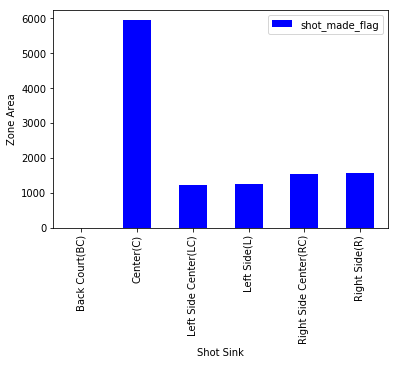

In [74]:
pivot = train.pivot_table(index='shot_zone_area', values='shot_made_flag', aggfunc=np.sum)
pivot.plot(kind='bar', color='blue')
plt.xlabel('Shot Sink')
plt.ylabel('Zone Area')
plt.xticks(rotation=90)
plt.show()

#### Shot Zone Basic:

In [75]:
print(train['shot_zone_basic'].unique())

['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']


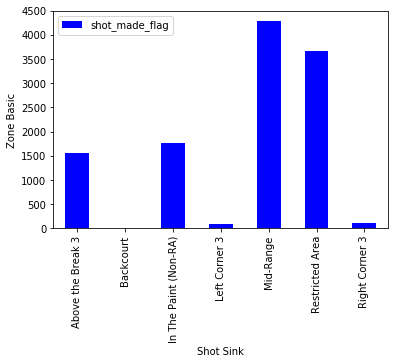

In [76]:
pivot = train.pivot_table(index='shot_zone_basic', values='shot_made_flag', aggfunc=np.sum)
pivot.plot(kind='bar', color='blue')
plt.xlabel('Shot Sink')
plt.ylabel('Zone Basic')
plt.xticks(rotation=90)
plt.show()

#### Shot Zone Range:

In [77]:
print(train['shot_zone_range'].unique())

['8-16 ft.' '16-24 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']


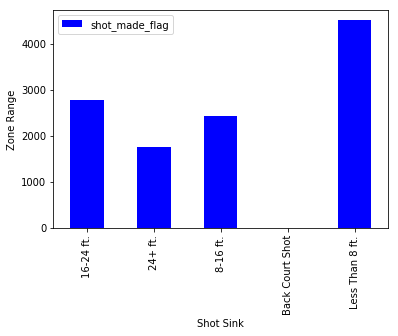

In [78]:
pivot = train.pivot_table(index='shot_zone_range', values='shot_made_flag', aggfunc=np.sum)
pivot.plot(kind='bar', color='blue')
plt.xlabel('Shot Sink')
plt.ylabel('Zone Range')
plt.xticks(rotation=90)
plt.show()

#### Visualize the shot zone features

Text(0.5,1,'Shot Zone Range')

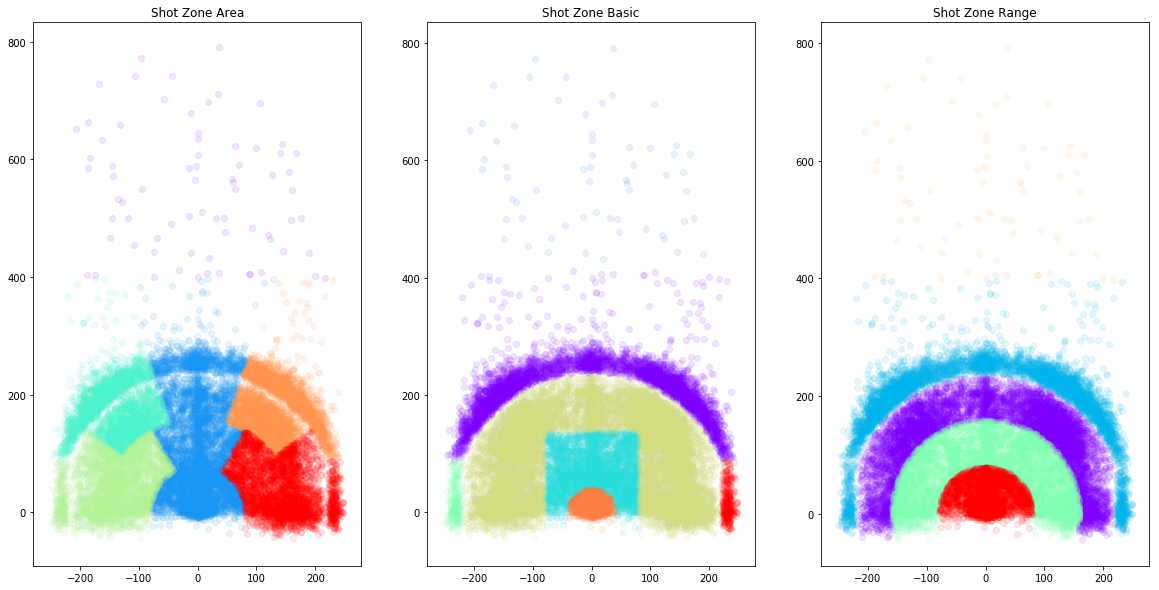

In [79]:
plt.figure(figsize=(20,10))

def scatter_plot_by_category(feat):
    alpha = 0.1
    gs = train.groupby(feat)
    cs = cm.rainbow(np.linspace(0, 1, len(gs)))
    for g, c in zip(gs, cs):
        plt.scatter(g[1].loc_x, g[1].loc_y, color=c, alpha=alpha)

# shot_zone_area
plt.subplot(131)
scatter_plot_by_category('shot_zone_area')
plt.title('Shot Zone Area')

# shot_zone_basic
plt.subplot(132)
scatter_plot_by_category('shot_zone_basic')
plt.title('Shot Zone Basic')

# shot_zone_range
plt.subplot(133)
scatter_plot_by_category('shot_zone_range')
plt.title('Shot Zone Range')

## Feature engineering

In [80]:
print(train['shot_zone_area'].value_counts())

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64


In [81]:
def encode_shot_zones(df):
    for zone_feat in ['area', 'basic', 'range']:
        codes = df['shot_zone_{}'.format(zone_feat)].astype('category').cat.codes
        df['shot_zone_{}_code'.format(zone_feat)] = codes
        df.drop(['shot_zone_{}'.format(zone_feat)], axis=1)
    return df

train = encode_shot_zones(train.copy())
holdout = encode_shot_zones(holdout.copy())

print(train['shot_zone_area_code'].value_counts())

1    11289
4     3981
5     3859
2     3364
3     3132
0       72
Name: shot_zone_area_code, dtype: int64


## Basic modeling

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 28 columns):
action_type             25697 non-null object
combined_shot_type      25697 non-null object
game_event_id           25697 non-null int64
game_id                 25697 non-null int64
lat                     25697 non-null float64
loc_x                   25697 non-null int64
loc_y                   25697 non-null int64
lon                     25697 non-null float64
minutes_remaining       25697 non-null int64
period                  25697 non-null int64
playoffs                25697 non-null int64
season                  25697 non-null object
seconds_remaining       25697 non-null int64
shot_distance           25697 non-null int64
shot_made_flag          25697 non-null float64
shot_type               25697 non-null object
shot_zone_area          25697 non-null object
shot_zone_basic         25697 non-null object
shot_zone_range         25697 non-null object
team_id                

In [83]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 30693
Data columns (total 28 columns):
action_type             5000 non-null object
combined_shot_type      5000 non-null object
game_event_id           5000 non-null int64
game_id                 5000 non-null int64
lat                     5000 non-null float64
loc_x                   5000 non-null int64
loc_y                   5000 non-null int64
lon                     5000 non-null float64
minutes_remaining       5000 non-null int64
period                  5000 non-null int64
playoffs                5000 non-null int64
season                  5000 non-null object
seconds_remaining       5000 non-null int64
shot_distance           5000 non-null int64
shot_made_flag          0 non-null float64
shot_type               5000 non-null object
shot_zone_area          5000 non-null object
shot_zone_basic         5000 non-null object
shot_zone_range         5000 non-null object
team_id                 5000 non-null int64
te

In [84]:
train = train.select_dtypes(include=[np.number]).interpolate().dropna()
holdout.drop(['shot_made_flag'], axis=1, inplace=True)
holdout = holdout.select_dtypes(include=[np.number]).interpolate().dropna()

X = train.drop(['shot_made_flag'], axis=1)
y = train['shot_made_flag']

In [85]:
holdout = holdout.select_dtypes(include=[np.number]).interpolate().dropna()
sum(holdout.isnull().sum() != 0)

0

In [86]:
holdout.shape

(5000, 16)

In [87]:
X.dtypes

game_event_id             int64
game_id                   int64
lat                     float64
loc_x                     int64
loc_y                     int64
lon                     float64
minutes_remaining         int64
period                    int64
playoffs                  int64
seconds_remaining         int64
shot_distance             int64
team_id                   int64
shot_id                   int64
shot_zone_area_code        int8
shot_zone_basic_code       int8
shot_zone_range_code       int8
dtype: object

In [88]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 30693
Data columns (total 16 columns):
game_event_id           5000 non-null int64
game_id                 5000 non-null int64
lat                     5000 non-null float64
loc_x                   5000 non-null int64
loc_y                   5000 non-null int64
lon                     5000 non-null float64
minutes_remaining       5000 non-null int64
period                  5000 non-null int64
playoffs                5000 non-null int64
seconds_remaining       5000 non-null int64
shot_distance           5000 non-null int64
team_id                 5000 non-null int64
shot_id                 5000 non-null int64
shot_zone_area_code     5000 non-null int8
shot_zone_basic_code    5000 non-null int8
shot_zone_range_code    5000 non-null int8
dtypes: float64(2), int64(11), int8(3)
memory usage: 561.5 KB


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=666)

In [90]:
classifier = RandomForestClassifier(n_estimators=100, max_features=10, max_depth=20, random_state=666)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=666, verbose=0, warm_start=False)

In [91]:
predictions = classifier.predict_proba(holdout)

In [93]:
len(predictions)

5000

In [94]:
len(predictions[:,1])

5000

## Submission

In [95]:
submission = pd.DataFrame({'shot_id': holdout_ids, 'shot_made_flag': predictions[:,1]})

submission.to_csv('submission.csv', index=False)